# Trade-off entre sesgo y varianza

En este notebook vamos a explorar los conceptos de sesgo y varianza en Machine Learning, y el trade-off que existe entre ellos.

__Sabemos que:__ Un modelo muy simple, que no captura la complejidad de nuestros datos, puede sufrir de subajuste.

__Varianza:__ Cuando decimos que un conjunto de números tiene mucha varianza es que están muy dispersos con respecto a su valor medio.

__Sesgo:__ Se suele usar para referirnos a estimadores que están siempre por encima o por debajo de lo que deberían dar. el **promedio** es un estimador no sesgado.

Sesgo es una propiedad de los estimadores (promedio, la varianza, la mediana, los percentiles, etc.), y la varianza también es un estimador.

Cuando calculamos un estimador a partir de datos, estos estimadores tienen sesgo y varianza.

A medida que tomamos más muestras, cada promedio obtenido está más cerca del valor real, es decir, menos dispersos alrededor del promedio. O, equivalentemente, se tiene menos varianza.  
El promedio, como estimador, puede tener sesgo y también tiene varianza. La varianza del promedio disminuye a medida que tomamos más muestras.

### Aprendizaje Inductivo

__Principio:__ Cualquier modelo que aproxime bien una función objetivo sobre un conjunto suficientemente grande de datos también aproximará bien a la función objetivo sobre datos no observado.

La idea es buscar una función que nos permita separar los grupos o clases de datos y a partir de allí crear una frontera de decisión para separar los mismos.

A medida que aumenta el número de muestras, va a ser más fácil hacer una buena generalización, para poder determinar una mejor frontera de decisión.


### Modelo vs. Algoritmo
Un modelo no es lo mismo que un algoritmo.
__Modelo:__ Es una abstracción. Es una construcción (estrategia) abstracta que busca aproximarnos a la realidad (aproximación teórica). Nos va a permitir que a partir de un algoritmo, podamos generar una estrategia. Enmarca al algoritmo.  
Busca resolver un problema o contestar una pregunta, por ej. "separar clases".
__Algoritmo:__ Cuando aplicamos el modelo a partir de los datos, es decir la materialización. Se utilizan herramientas matemáticas. 

### Error:

__*error total = error irreducible + error debido al sesgo + error debido a la varianza*__

__Error irreducible:__ conocido como el error debido al ruido presente en los datos, como por ejemplo: los errores humanos en la medición de alguna variable (feature), los errores propios de las herramientas de medición, entre otros. Es *imposible de eliminar*. Podemos definir al error irreducible, como la diferencia entre el valor medido y el valor que habría dado la verdadera.

__Error debido al sesgo (Bias):__ incapacidad de un modelo para generalizar la relación entre los datos de entrada y los datos de salida. Los modelos con alto sesgo “subestiman” el problema, lo que se traduce en un error de entrenamiento alto. (Underfiting). Matemáticamente, lo podemos definir como la diferencia entre el valor esperado de la predicción del modelo y el valor predicho por la verdadera relación.

__Error debido a la varianza:__ la varianza cuantifica la tendencia de un modelo a aprender demasiado sobre la relación entre los datos de entrada y los datos de salida. Dicho de otra manera, un modelo con alta varianza, es un modelo que se “aprendió de memoria los datos” (Overfiting). Matemáticamente, podemos definirlo como la diferencia esperada al cuadrado entre la predicción del modelo en un único conjunto de datos de entrenamiento y su predicción promedio en todos los conjuntos de entrenamiento.

El error debido al sesgo y el error debido a la varianza forman el error reducible, es decir, aquel que se origina en nuestro modelo y no es inherente de los datos.

Los Data Scientists debemos encontrar una relación de compromiso entre un modelo muy simple (alto sesgo) y uno muy complejo (alta varianza).  
Si encontramos el punto óptimo (bajo sesgo y baja varianza) podremos minimizar el error total del modelo.

### 4 Casos:

**Bajo sesgo y alta varianza:** El modelo se encuentra sobreajustado a los datos de entrenamiento, por lo tanto cuando lo probemos con datos nunca vistos, su rendimiento será muy bajo.  
Qué podemos hacer para combatirlo: aplicar feature engineering, reducción de dimensionalidad, simplificar el modelo, aplicar regularización, realizar un ajuste de hiperparámetros, conseguir más datos.

**Alto sesgo y baja varianza:** El modelo no logra capturar la verdadera relación entre los datos de entrada y los datos de salida. Lo que se traduce en un mal rendimiento, tanto en entrenamiento como en testing.  
Qué podemos hacer para combatirlo: agregar más features, probar con un modelo más flexible (más complejo), realizar un ajuste de hiper-parámetros.

**Alto bias y alta varianza:** ¡Este es el peor de los casos! En primer lugar debemos tratar de mejorar el error de entrenamiento y luego abordar el error en testing.  
Básicamente, tenemos que hacer un borrón y cuenta nueva.

**Bajo bias y baja varianza:** Esto es lo que buscamos en un modelo, si logramos un modelo con estas características estamos ante un escenario muy favorable, donde la complejidad resulta ser la justa y necesaria.

##  1. Preliminares

En este notebook vamos a trabajar en un problema de regresión con datos de entrenamiento generados artificialmente. Para ajustar un modelo a esos datos, utilizaremos la regresión lineal. Sin embargo, la relación entre `x` e `y` NO será lineal, por lo que tendremos que hacer un poco de manejo de features para lograrlo. Para entender la idea, veamos el siguiente ejemplo.

$$ y  = 1 - 3x + 5x^2 $$

La relación entre $x$ e $y$ no es lineal, pero si a partir de $x$ creamos un nuevo atributo $x_1 = x^2$, ahora tenemos 

$$ y  = 1 - 3x + 5x_1 $$

Entonces, lo que hicimos fue convertir un problema no lineal de una variable en un problema lineal de dos variables. ¿Les suena parecido a algo que hayamos visto?

En general, nosotros no conocemos la relación funcional entre los features ($x$) y la variable que queremos predecir ($y$). Entonces, lo que hacemos es *probar* agregando muchos features nuevos, elevando al cuadrado, al cubo, a la cuarta, etc. Pero llega un momento donde corremos el riesgo de sobreajustar nuestros datos: matemáticamente, si tenemos $n$ datos, podemos ajustar un polinomio de grado $n-1$ a ellos perfectamente. Es decir, la cantidad de features nuevos que creemos y la potencia más alta a la que elevaremos $x$ es un **hiperparámetro**.

En Python, es sencillo hacer este ajuste utilizando la [matriz de Vandermonde](https://es.wikipedia.org/wiki/Matriz_de_Vandermonde). Ésta es una matriz que, dado un vector $x$, tiene en cada columna la potencia de ese vector. Por ejempo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.array([1,2,3])
np.vander(x1, N = 4, increasing = True)
# Generar una matriz de Vandermonde.
# Las columnas de la matriz de salida son potencias del vector de entrada.
# El orden de los poderes está determinado por el argumento booleano creciente.
# increasing: Si es true, los poderes aumentan de izquierda a derecha, si es false (el valor predeterminado) se invierten.

array([[ 1,  1,  1,  1],
       [ 1,  2,  4,  8],
       [ 1,  3,  9, 27]])

**Para pensar y probar:** Si `N = 5`, ¿hasta qué potencia eleva al vector?¿Qué ocurre si ponen `increasing = False`?

* Si N = 5, el vector eleva hasta la 4ta potencia.
* Si increase = False, se invierten los valores.

Notar que la matriz de Vandermonde ya devuelve un arreglo al cual Scikit-Learn puede usar como features.

**Ejercicio:** Prestar atención a las siguientes funciones. ¿Qué hacen? Utilizarlas para implementar el ejemplo de la explicación, con 100 valores de `x` entre -2 y 2. Visualizar.

In [3]:
from sklearn.linear_model import LinearRegression

def fit_polynomial(x, y, degree):
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

In [4]:
x = np.linspace(-2,2,100)
y = 1 - 3*x + 5*x**2

In [5]:
model = fit_polynomial(x, y, 2)
p_y = apply_polynomial(model, x)
print(model.coef_)

[ 5. -3.  0.]


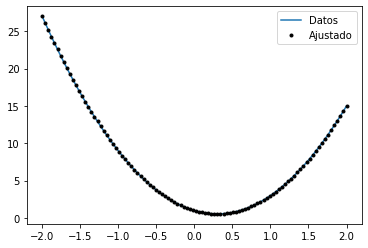

In [6]:
plt.plot(x, y, label = 'Datos')
plt.plot(x, p_y, 'k.', label = 'Ajustado')
plt.legend()
plt.show()

## 2. Generación de datos de entrenamiento

Ahora, vamos a generar los datos de entrenamiento con los que trabajaremos. Trabajaremos en un problema de regresión, del cual conoceremos la forma funcional entre las variables `x` e `y`:

$$ y  = 2sin(1.5x) $$

**Ejercicio:** escribir una función `sample` que genere muestras **con ruido gaussiano** de esta función. Sus argumentos deben ser `x_min`, `x_max` y `size`, que representan el mínimo y máximo del rango de `x` y la cantidad de muestras a obtener. Luego, graficar las muestras obtenidas y graficar una curva que represente la función **sin ruido**.

In [7]:
def sample(x_min, x_max, size):
    x = np.linspace(x_min, x_max, size)
    y = 2 * np.sin(x * 1.5) + np.random.randn(size)
    return (x,y)

In [8]:
x, y = sample(x_min = 0, x_max = 4.5, size = 50)
f_x = np.linspace(0, 4.5, 50)
f_y = 2 * np.sin(x * 1.5)

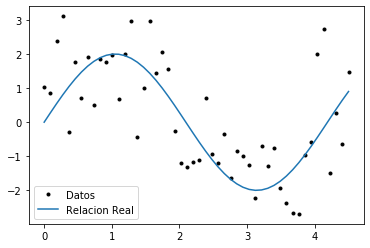

In [9]:
plt.plot(x,y, 'k.', label = 'Datos')
plt.plot(f_x, f_y, label = 'Relacion Real')
plt.legend()
plt.show()

## 3. Sesgo y Varianza

**Ejercicio:** ajustar los datos obtenidos con un polinomio de grado uno (lineal), grado dos (cuadrática) y grado tres (cúbica). Graficar. **Pista:** si lo hacen dentro de un `for`, ¡es muy sencillo!

**Para pensar y probar:** ¿cuál modelo dependerá más de los datos de entrenamiento?¿Y si ajustan un polinomio de grado mayor? Volver a generar datos de entrenamiento y ver qué cambia.

In [10]:
grados = [1,2,3]

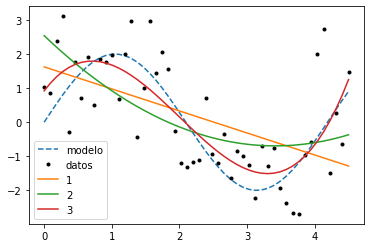

In [11]:
plt.plot(x, f_y,'--', label =  'modelo')
plt.plot(x, y, 'k.', label =  'datos')

for grado in grados:
    model = fit_polynomial(x, y, grado)
    p_y = apply_polynomial(model, x)
    plt.plot(x, p_y, label = grado)
    
plt.legend()
plt.show()

### Promedio de modelos

Para hacer más evidente la dependencia (o no) de los polinomios de los datos de entrenamiento, generaremos varias muestras de datos, y con cada uno de esos set entrenaremos un modelo de grado a elección. También, graficaremos el modelo promedio obtenido de todos esos modelos.

**Ejercicio:** correr la siguiente celda para diferentes grados (`degree`) del polinomio. ¿Cómo son los modelos obtenidos?¿Cuáles varían más con los datos de entrenamiento?¿Qué ocurre con el modelo promedio?¿Cuándo se parece a la "relación real"?

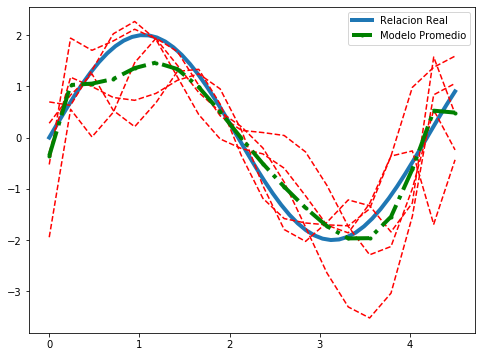

In [12]:
degree = 10
n_samples = 20
n_models = 5
avg_y = np.zeros(n_samples)

plt.figure(figsize = (8,6))
plt.plot(f_x, f_y, label = 'Relacion Real', lw = 4)
for i in range(n_models):
    (x,y) = sample(x_min = 0, x_max = 4.5, size = n_samples)
    model = fit_polynomial(x, y, degree)
    p_y = apply_polynomial(model, x)
    avg_y = avg_y + p_y
    plt.plot(x, p_y, 'r--')
avg_y = avg_y / n_models
plt.plot(x, avg_y, 'g.-.', label = 'Modelo Promedio', lw = 4)
plt.legend()
plt.show()

### Cálculo de sesgo y varianza

Recordemos que el sesgo es el error de que surge de las suposiciones que tiene nuestro modelo. Cuántos más supuestos, menos flexible será. La varianza, en cambio, es el error que surge de la sensibilidad de nuestro modelo a variaciones en el set de entrenamiento. Cuánto más flexible nuestro modelo, más se ajustará a los datos de entrenamiento. Entonces, el sesgo está asociado a modelos *underfiteados*, mientras que la varianza a modelos *overfiteados*. Por lo tanto, la "variable" que controla si nuestro modelo estará sesgado o sufrirá de mucha varianza es su complejidad. Por eso, decimos que hay un trade-off entre ambos errores.

Notar que, para hablar de sesgo y varianza, consideramos que tenemos muchos modelos. Esto no suele ser así en la aplicación. La pregunta que debemos hacernos es: si entrenara muchas veces este mismo modelo, pero con variaciones en el dataset, ¿cuánto espero que varíe mi modelo? Si varía mucho, probablemente tenga mucha varianza y, por lo tanto, esté overfiteado. Si varía muy poco o directamente no varía, probablemente esté sesgado y underfiteado.

Pero, ¿cómo se calculan ambos errores? Podemos calcular la varianza como cuánto varía en promedio el output de cada modelo entrenado con respecto al promedio de todos los modelos entrenados. Parece un trabalenguas. El sesgo, en cambio, es cuánto se desvía la salida del promedio de los modelos con respecto al verdero output.

Veámoslo en el código. Al igual que en el ejemplo anterior, generamos varias muestras y ajustamos un polinomio a cada una. Calculamos el sesgo y la varianza entre los modelos para diferentes grados polinómicos. El sesgo, la varianza y el error se grafican para diferentes valores de grado.

**Ejercicio:** leer detenidamente las siguientes lineas de código. Prestar atención a qué variable recorre cada `for` y qué se calcula dentro de cada bucle. Comentar el código a medida que comprendan cada paso del mismo.

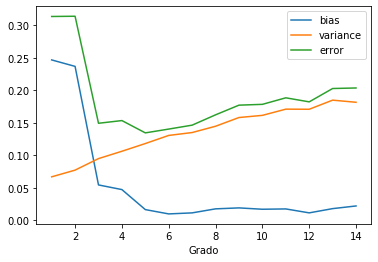

In [13]:
from numpy.linalg import norm

n_samples = 20

f_x = np.linspace(0, 4.5, n_samples)
f_y = 2 * np.sin(x * 1.5)

n_models = 100
max_degree = 15
var_vals =[]
bias_vals = []
error_vals = []

for degree in range(1, max_degree):
    avg_y = np.zeros(n_samples)
    models = []
    for i in range(n_models):
        (x,y) = sample(0,4.5, n_samples)
        model = fit_polynomial(x, y, degree)
        p_y = apply_polynomial(model, x)
        avg_y = avg_y + p_y
        models.append(p_y)
    avg_y = avg_y / n_models
    bias_2 = np.linalg.norm(avg_y - f_y)/f_y.size
    bias_vals.append(bias_2)
    variance = 0
    for p_y in models:
        variance += np.linalg.norm(avg_y - p_y)
    variance /= f_y.size * n_models
    var_vals.append(variance)
    error_vals.append(variance + bias_2)

    
### Graficamos
plt.plot(range(1, max_degree), bias_vals, label='bias')
plt.plot(range(1, max_degree), var_vals, label='variance')
plt.plot(range(1, max_degree), error_vals, label='error')
plt.xlabel('Grado')
plt.legend()
plt.show()